<a href="https://colab.research.google.com/github/manisha-dhanuka/Linear-Regression/blob/main/yes_bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing various packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing required functions/modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
#Loading the data file
stock_price = pd.read_csv("/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv",date_parser = 'Date')

In [4]:
# overview of the data
stock_price.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
#Changing index to Date
stock_price = stock_price.set_index('Date')

In [7]:
stock_price

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95
Aug-20,12.00,17.16,11.85,14.37
Sep-20,14.30,15.34,12.75,13.15


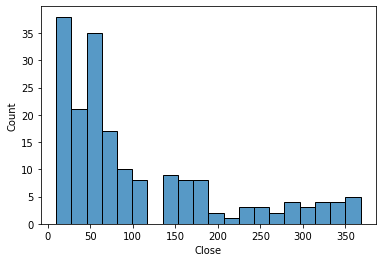

In [8]:
#Plotting Close to see the distribution of close
sns.histplot(data = stock_price, x= 'Close',bins = 20)

# Observation 1:
From the Below jointplots it seems that all the independent variables are in linear relationship with the dependent values.

This checks the first assumption of Linear Regression Model.

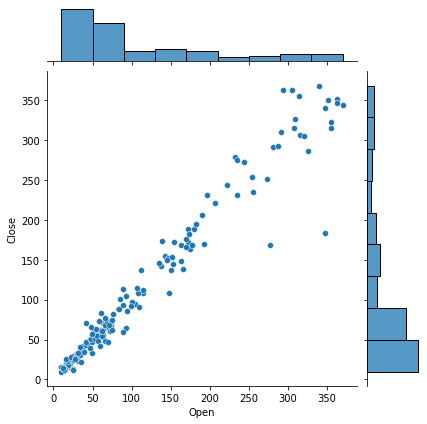

In [24]:
# Checking relation between independent variables individually:
# Plotting Close against open values:
sns.jointplot(data = stock_price, x='Open', y= 'Close')


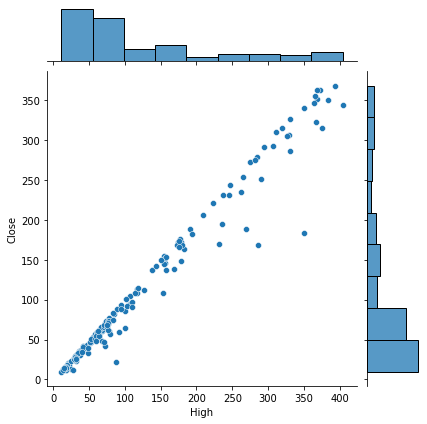

In [25]:
# Plotting Close against High values:
sns.jointplot(data = stock_price, x='High', y= 'Close')

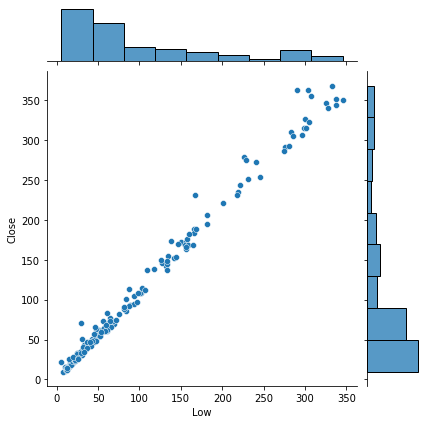

In [26]:
# Plotting Close against Low values:
sns.jointplot(data = stock_price, x='Low', y= 'Close')

# Observation 2:

From the correlation matrix and heatmap, it seems that the multicollinearity condition is there in between independent variables. Firs, we will calculate the r2 error and then Variance of inflation to check if it is making a big difference or not.


In [27]:
corr_matrix = stock_price.corr()

In [28]:
print(corr_matrix)

           Open      High       Low     Close
Open   1.000000  0.993040  0.983978  0.977971
High   0.993040  1.000000  0.983422  0.985051
Low    0.983978  0.983422  1.000000  0.995358
Close  0.977971  0.985051  0.995358  1.000000


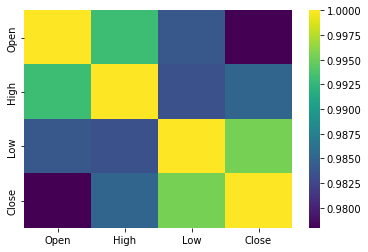

In [29]:
# Visualising correlation between the variables:
sns.heatmap(corr_matrix, cmap = 'viridis')

# Data Preprocessing And Model creation:

In [40]:
# Creating independent and dependent values dataframe:
X = stock_price.drop('Close', axis=1)
y = stock_price["Close"]
dependent_variable= ['Close']
independent_variables = list(X.columns)

In [31]:
# Splitting the Data into train and test Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Normalising the independent variables using Min Max Scaler :
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Creating Linear Regression Model:
regress= LinearRegression()

In [34]:
# Fitting the train Data into the model:
regress.fit(X_train,y_train)

LinearRegression()

In [35]:
# The coefficient values for the best fit line :
regress.coef_

array([-222.0456361 ,  275.35920521,  309.02269638])

In [36]:
# The intercept value for the best fit line :
regress.intercept_

9.855716182049576

# Best Fit line gives the predicted Values as:


## predicted_close = (-222.0456361 * Open )+ (275.35920521 * High) + (309.02269638 * Low) + 9.855716182049576

# Predicting Values:

In [41]:
predicted_train = regress.predict(X_train)
predicted_test = regress.predict(X_test)

In [42]:
print(predicted_test)

[ 29.83355878  14.68678086 378.00120607 130.26504655 314.41110213
  23.21302226  39.88638607  61.82503372 165.99641748  67.46521961
  47.81826351 202.13082646  66.79067093  36.39297436  15.89451916
  26.44378403  46.25622638  25.02174252  61.69655774  51.82582963
 184.93211123 152.58381782 376.360921    36.94538489  19.28157366
 134.61417987  59.86342522  32.84189444  53.02440071 147.06450844
  57.8059216   48.14934985 165.95810763 260.60147661  52.46818464
  51.8947312   45.64552589  62.24350901  52.01241888  48.54794816
  15.63570271  14.88754627 232.65674116 105.340374   325.3167687
  78.14017442 114.24832998  25.26380572 165.91961318  67.95659085
  55.54427404 235.62713063  14.10452941 268.2697825   24.71404975
  44.87571859 337.96600816  69.04504188 351.34945916  39.77051826
 187.36327287  27.10980191]


# Evaluation of the model:

In [46]:
print(f"Mean  of y values : {y.mean()} \nMean of predicted Train Values: {predicted_train.mean()} \nMean of predicted Test Values: {predicted_test.mean()}")

Mean  of y values : 105.2047027027027 
Mean of predicted Train Values: 104.98796747967484 
Mean of predicted Test Values: 107.25483537330896


In [47]:
# Evaluating Train Values:
#Mean Absolute error:
MAE_train = mean_absolute_error( y_train, predicted_train)

# Mean squared Error:
MSE_train = mean_squared_error( y_train, predicted_train)

# Root mean squared error:
RMSE_train = np.sqrt(mean_squared_error( y_train, predicted_train))

# R2_score
r2_train = r2_score(y_train, predicted_train)

In [48]:
# Evaluating Test Values:
#Mean Absolute error:
MAE_test = mean_absolute_error( y_test, predicted_test)

# Mean squared Error:
MSE_test = mean_squared_error( y_test, predicted_test)

# Root mean squared error:
RMSE_test = np.sqrt(mean_squared_error( y_test, predicted_test))

# R2_score
r2_test = r2_score(y_test, predicted_test)

# Comparing Errors of predicted Train and predicted Test Values:

After seeing error_df, it seems that error in Train Data is less in comparison to Test Data


In [51]:
error_df = pd.DataFrame(index = [' Predicted Train','Predicted Test'], data = {'Mean Absolute Error': [MAE_train, MAE_test], 'Mean Squared Error':[MSE_train, MSE_test] ,'Root Mean Squared Error': [RMSE_train, RMSE_test],'R2 Error': [r2_train, r2_test]})

In [52]:
error_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Error
Predicted Train,3.391622,30.524398,5.524889,0.996777
Predicted Test,5.189341,95.524079,9.773642,0.990500


# All about the Residuals:

In [54]:
test_residuals = y_test - predicted_test
test_residuals.mean()

-1.6201579539541398

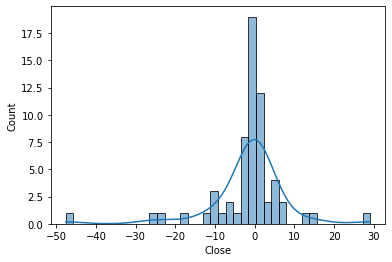

In [55]:
# Checking the residual Distribution: 

sns.histplot(test_residuals ,kde = True)

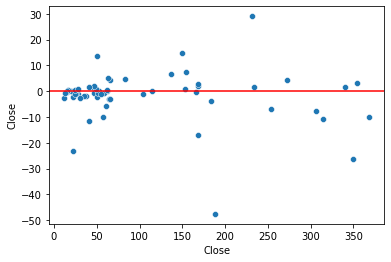

In [56]:
sns.scatterplot(x= y_test, y= test_residuals)
plt.axhline(y=0, color = 'red')